<a href="https://colab.research.google.com/github/Lor3nzoVis3/DeepLearning_ProjectLV_GB/blob/master/FromScratch_gridsearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
@author: LorenzoVisentini
"""
modelName = "FromScratch"


#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#keras
# from kera.wrappers.scikit_learn import KerasClassifier
from keras.preprocessing.image  import ImageDataGenerator
# from sklearn.model_selection import train_test_split
from keras.layers import Dense, Dropout, Flatten, Conv2D
from keras.layers import BatchNormalization, MaxPooling2D, Dropout
from keras.models import Model, Sequential
from keras import optimizers

# from sklearn.model_selection import GridSearchCV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Images parameters
img_width = 178 
img_height = 218

# train_dir = './source_light/training'
# validation_dir = './source_light/validation' 
train_dir = '/content/drive/My Drive/Deep Learning Project - Image Classification/orient/train'
validation_dir = '/content/drive/My Drive/Deep Learning Project - Image Classification/orient/valid' 

# batch_size = 64
# epochs = 20
# convDepth = 16
# dropRate = 0.5

In [ ]:
#model
def create_model(convDepth, dropRate, learning_rate):
    model = Sequential()

    model.add(Conv2D(convDepth, kernel_size = (3,3), activation= 'relu'))
    model.add(Conv2D(convDepth, kernel_size = (3,3), activation= 'relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2),strides = 1))
    model.add(Dropout(dropRate))

    model.add(Conv2D(convDepth, kernel_size = (3,3), activation= 'relu'))
    model.add(Conv2D(convDepth, kernel_size = (3,3), activation= 'relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2),strides = 1))
    model.add(Dropout(dropRate))

    model.add(Conv2D(convDepth*2, kernel_size = (3,3), activation= 'relu'))
    model.add(Conv2D(convDepth*2, kernel_size = (3,3), activation= 'relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2),strides = 2))
    model.add(Dropout(dropRate*1.5))

    model.add(Conv2D(convDepth*2, kernel_size = (3,3), activation= 'relu'))
    model.add(Conv2D(convDepth*2, kernel_size = (3,3), activation= 'relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2),strides = 2))
    model.add(Dropout(dropRate*1.5))

    model.add(Flatten())
    model.add(Dense(512, activation= 'relu'))
    model.add(Dense(512, activation= 'relu'))
    model.add(BatchNormalization())
    model.add(Dense(3, activation= 'softmax'))

    opt = optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer = opt,
              loss = 'categorical_crossentropy',  #because we have 3 possible outputs
              metrics = ['accuracy'])

    return model

In [ ]:
# opt = optimizers.Adam(learning_rate=0.005)
# model.compile(optimizer = opt,
#               loss = 'categorical_crossentropy',  #because we have 3 possible outputs
#               metrics = ['accuracy'])

In [ ]:
#grid search
epochs = [10, 20]
batch_size = [64, 128]
convDepth = [32, 64]
learning_rate = [0.005, 0.01]
dropRate = [0.4, 0.5, 0.6]

params = []

for epoch in epochs:
    for size in batch_size:
        for depth in convDepth:
            for rate in dropRate:
                for lr in learning_rate:
                    model = create_model(depth, rate, lr)

                    print("Model with {} epochs, {} of batch_size, {} of convDepth, {} of drop rate and {} of learning rate" .format(epoch, size, depth, rate, lr))

                    #preprocessing
                    datagen = ImageDataGenerator()
                    train_generator = datagen.flow_from_directory(directory=train_dir,
                                                                        target_size=(img_height, img_width),
                                                                        color_mode="rgb",
                                                                        batch_size=size,
                                                                        class_mode="categorical",
                                                                        shuffle=True,
                                                                        seed=42
                                                                        )

                    val_generator = datagen.flow_from_directory(directory=validation_dir,
                                                                        target_size=(img_height, img_width),
                                                                        color_mode="rgb",
                                                                        batch_size=size,
                                                                        class_mode="categorical",
                                                                        shuffle=True,
                                                                        seed=42
                                                                        )
                    history = model.fit_generator(generator = train_generator,
                                            steps_per_epoch = train_generator.n//size,
                                            epochs = epoch,
                                            validation_data = val_generator,
                                            validation_steps=val_generator.n//size
                                            )
                    print("History of model with {} epochs, {} of batch_size, {} of convDepth, {} of drop rate and {} of learning rate" .format(epoch, size, depth, rate, lr))
                    print(history)

Model with 10 epochs, 64 of batch_size, 32 of convDepth, 0.4 of drop rate and 0.005 of learning rate
Found 8383 images belonging to 3 classes.
Found 1811 images belonging to 3 classes.
Epoch 1/10


ResourceExhaustedError: ignored

In [ ]:
# summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
# history = model.fit_generator(generator = train_generator,
#                              steps_per_epoch = train_generator.n//batch_size,
#                              epochs = epochs,
#                              validation_data = val_generator,
#                              validation_steps=val_generator.n//batch_size
#                              )

Epoch 1/20
130/130 [==============================] - 80s 618ms/step - loss: 0.6267 - accuracy: 0.7568 - val_loss: 0.5969 - val_accuracy: 0.7958
Epoch 2/20
130/130 [==============================] - 77s 590ms/step - loss: 0.3910 - accuracy: 0.8472 - val_loss: 0.6126 - val_accuracy: 0.8036
Epoch 3/20
130/130 [==============================] - 77s 590ms/step - loss: 0.3526 - accuracy: 0.8588 - val_loss: 2.9567 - val_accuracy: 0.2617
Epoch 4/20
130/130 [==============================] - 77s 590ms/step - loss: 0.3768 - accuracy: 0.8485 - val_loss: 0.5256 - val_accuracy: 0.8013
Epoch 5/20
130/130 [==============================] - 77s 590ms/step - loss: 0.3097 - accuracy: 0.8755 - val_loss: 0.4844 - val_accuracy: 0.8393
Epoch 6/20
130/130 [==============================] - 77s 589ms/step - loss: 0.2794 - accuracy: 0.8877 - val_loss: 0.4974 - val_accuracy: 0.8365
Epoch 7/20
130/130 [==============================] - 77s 590ms/step - loss: 0.2393 - accuracy: 0.9040 - val_loss: 0.5390 - val_ac

In [ ]:
#save model and history
file_model = '/content/drive/My Drive/Deep Learning Project - Image Classification/Models/'+ 'FaceOrientation' + modelName + '_Dropout1.5'+ str(dropRate) + '_' + str(batch_size) + '_' + str(epochs) + '_' + str(convDepth)
model.save(file_model + '.h5')
print(file_model)
#save history
file_hist = '/content/drive/My Drive/Deep Learning Project - Image Classification/History/'+ 'FaceOrientation' + modelName + '_Dropout1.5'+ str(dropRate) + '_' + str(batch_size) + str(epochs) + '_' + str(convDepth) + '.csv'
df_history = pd.DataFrame(history.history)
with open(file_hist, 'w') as file:
    df_history.to_csv(file)

/content/drive/My Drive/Deep Learning Project - Image Classification/Models/FaceOrientationFromScratch_Dropout1.50.5_64_20_16


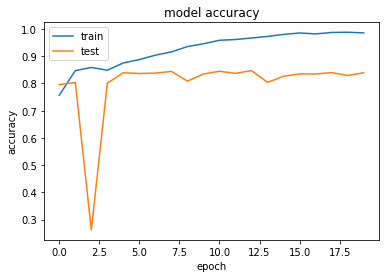

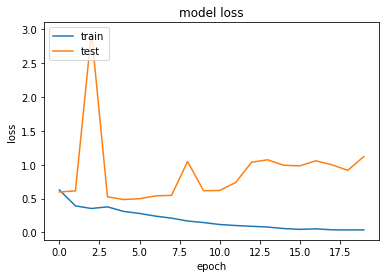

In [ ]:
#plot results
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#evaluation
# https://stackoverflow.com/questions/40564936/keras-what-is-the-difference-between-model-evaluate-generator-and-model-predict
steps = val_generator.n // val_generator.batch_size

accuracy_ontest = model.evaluate_generator(val_generator, steps)
predictions_ontest = model.predict_generator(val_generator, steps)
print(accuracy_ontest)
print(predictions_ontest)

[0.4992384910583496, 0.8247767686843872]
[[8.2394099e-06 8.5155627e-10 9.9999177e-01]
 [1.2678439e-03 9.9831617e-01 4.1601181e-04]
 [8.9197934e-01 4.6278320e-02 6.1742350e-02]
 ...
 [9.9943906e-01 3.4141340e-04 2.1943636e-04]
 [1.9873618e-01 5.9810968e-06 8.0125785e-01]
 [9.9793756e-01 1.4924729e-03 5.6992925e-04]]
